In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive/Data Sets')

In [0]:
!unzip -q Multi_Label_dataset.zip -d unzipped/

In [4]:
train = pd.read_csv('/content/drive/My Drive/Data Sets/unzipped/Multi_Label_dataset/train.csv')    # reading the csv file
train.head() 

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [6]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/drive/My Drive/Data Sets/unzipped/Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(250,250,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [51:43<00:00,  2.53it/s]


In [7]:
X.shape

(7254, 250, 250, 3)

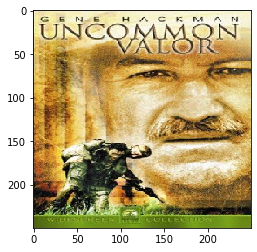

In [8]:
plt.imshow(X[19])

In [9]:
train['Genre'][19]

"['Action', 'Drama', 'Thriller']"

In [10]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(250, 250,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [17]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 246, 246, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 123, 123, 16)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 123, 123, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 119, 119, 32)      12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 55, 55, 64)       

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)





Train on 6528 samples, validate on 726 samples
Epoch 1/10





6528/6528 [==============================] - 27s 4ms/step - loss: 0.3924 - acc: 0.8310 - val_loss: 0.2696 - val_acc: 0.9061
Epoch 2/10
6528/6528 [==============================] - 18s 3ms/step - loss: 0.2791 - acc: 0.9022 - val_loss: 0.2623 - val_acc: 0.9061
Epoch 3/10
6528/6528 [==============================] - 18s 3ms/step - loss: 0.2643 - acc: 0.9063 - val_loss: 0.2466 - val_acc: 0.9066
Epoch 4/10
6528/6528 [==============================] - 18s 3ms/step - loss: 0.2583 - acc: 0.9070 - val_loss: 0.2420 - val_acc: 0.9061
Epoch 5/10
6528/6528 [==============================] - 18s 3ms/step - loss: 0.2537 - acc: 0.9077 - val_loss: 0.2488 - val_acc: 0.9061
Epoch 6/10
6528/6528 [==============================] - 18s 3ms/step - loss: 0.2510 - acc: 0.9076 - val_loss: 0.2423 - val_acc: 0.9063
Epoch 7/10
6528/6528 [==============================] - 18s 3ms/step - loss: 0.2479 - acc: 0.9083 - val_loss: 0.2392 - val_acc: 0.9066


Drama (0.513)
Action (0.273)
Crime (0.228)


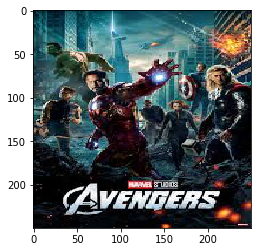

In [24]:
img = image.load_img('/content/avengers.jpeg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Drama (0.506)
Action (0.275)
Thriller (0.245)


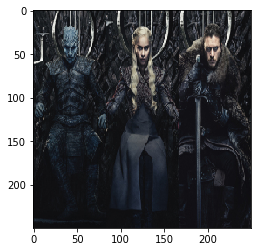

In [26]:
img = image.load_img('/content/GOT.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Drama (0.519)
Action (0.263)
Comedy (0.239)


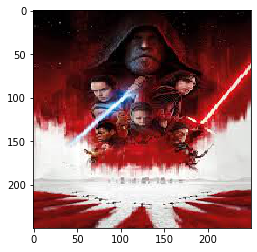

In [27]:
img = image.load_img('/content/s1.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Drama (0.507)
Action (0.274)
Thriller (0.243)


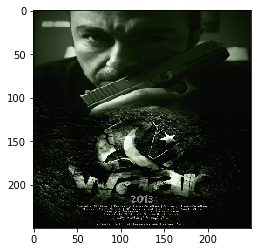

In [28]:
img = image.load_img('/content/w1.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Drama (0.517)
Comedy (0.327)
Action (0.232)


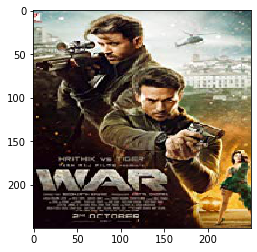

In [29]:
img = image.load_img('/content/waar.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)